## **Chicago Crime Data Analysis** ##

In [2]:
# Install required packages
# %pip install gdown dask pyarrow

## **Dataset Setup and Loading**

In [3]:
# Import the necessary libraries
import gdown
import zipfile


#libraries for data wrangling
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# import dask.dataframe as dd

In [4]:
#set up views
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 1000)

In [5]:
# Download dataset from Google Drive
# rawlink= "https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing"
# file_id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"
# output = "crime.zip"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

In [6]:
# with zipfile.ZipFile(output, "r") as z:
#     # List files
#     print(z.namelist())
#     z.extractall("crime_data")

In [7]:

# # Extract zip and check contents
# with zipfile.ZipFile(output, "r") as z:
#     print(z.namelist())   # list files inside
#     z.extractall("crime_data")

# # Load CSV with Dask 
# csv_path = "crime_data/Crimes_-_2001_to_Present.csv"
# crime_data = dd.read_csv(csv_path, low_memory=False)

# Explicitly define data types for each column in the Crimes dataset to reduce memory usage
# dtypes_dict = {
#     'ID': 'Int32',                 
#     'Case Number': 'string',        
#     'Block': 'string',              
#     'IUCR': 'string',              
#     'Primary Type': 'category',    
#     'Description': 'category',      
#     'Location Description': 'category', 
#     'Arrest': 'boolean',              
#     'Domestic': 'boolean',             
#     'Beat': 'Int16',                
#     'District': 'Int8',             
#     'Ward': 'Int8',                
#     'Community Area': 'Int8',      
#     'FBI Code': 'category',         
#     'X Coordinate': 'float32',      
#     'Y Coordinate': 'float32',     
#     'Year': 'float64',             
#     'Latitude': 'float32',         
#     'Longitude': 'float32',        
#     'Location': 'string'            
# }

# crime_data = dd.read_csv(
#     "crime_data/Crimes_-_2001_to_Present.csv",  
#     # dtype=dtypes_dict,                          
#     parse_dates=['Date', 'Updated On'],  
#     keep_default_na=True,

#     low_memory= False
# )

In [8]:
# with zipfile.ZipFile(output, "r") as z:
#     # List files
#     print(z.namelist())
#     z.extractall("crime_data")

In [9]:
# Explicitly defining data types for each column in the Crimes dataset to reduce memory usage
dtypes_dict = {
    'ID': 'Int32',                 
    'Case Number': 'string',        
    'Block': 'string',              
    'IUCR': 'string',              
    'Primary Type': 'category',    
    'Description': 'category',      
    'Location Description': 'category', 
    'Arrest': 'boolean',              
    'Domestic': 'boolean',             
    'Beat': 'Int16',                
    'District': 'Int8',             
    'Ward': 'Int8',                
    'Community Area': 'Int8',      
    'FBI Code': 'category',         
    'X Coordinate': 'float32',      
    'Y Coordinate': 'float32',     
    'Year': 'float64',             
    'Latitude': 'float32',         
    'Longitude': 'float32',        
    'Location': 'string'            
}

crime_data = pd.read_csv(
    "crime_data/Crimes_-_2001_to_Present.csv",
    dtype=dtypes_dict,
    parse_dates=['Date', 'Updated On'],
    date_format="%m/%d/%Y %I:%M:%S %p",
    keep_default_na=True,
    low_memory=False
)



# Preview the first 5 rows of the dataset
crime_data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


## **Preliminary Data Analysis**

In [10]:
# copying the data into a new variable for wrangling
crime_data2 = crime_data.copy()
crime_data2.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"


In [11]:
crime_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    Int32         
 1   Case Number           string        
 2   Date                  datetime64[ns]
 3   Block                 string        
 4   IUCR                  string        
 5   Primary Type          category      
 6   Description           category      
 7   Location Description  category      
 8   Arrest                boolean       
 9   Domestic              boolean       
 10  Beat                  Int16         
 11  District              Int8          
 12  Ward                  Int8          
 13  Community Area        Int8          
 14  FBI Code              category      
 15  X Coordinate          float32       
 16  Y Coordinate          float32       
 17  Year                  float64       
 18  Updated On            datetime64[ns]
 19  

In [12]:
# Checking the  data types
crime_data2.dtypes




ID                               Int32
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type                  category
Description                   category
Location Description          category
Arrest                         boolean
Domestic                       boolean
Beat                             Int16
District                          Int8
Ward                              Int8
Community Area                    Int8
FBI Code                      category
X Coordinate                   float32
Y Coordinate                   float32
Year                           float64
Updated On              datetime64[ns]
Latitude                       float32
Longitude                      float32
Location                string[python]
dtype: object

In [13]:
# Check column names
crime_data2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [14]:
# Preview first 5 rows
crime_data2.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


In [15]:
# Rename all columns to lowercase and replace spaces with underscores
crime_data2= crime_data2.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))

In [16]:
# Preview updated column names
crime_data2.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location'], dtype='object')

In [17]:
crime_data2.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


In [18]:
#Check for missing values in each column
crime_data.isnull().sum()


ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [19]:
#Check for missing values in each column
crime_data.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [20]:
# checking for duplicate values
crime_data2.duplicated().sum()

np.int64(0)

In [21]:

# checking for empty values
crime_data2.empty

False

## **Exploratory Data Analysis**

In [22]:
# checking the number of years of the data
crime_data2["year"] = crime_data2["year"].astype("int").astype("int")
crime_data2["year"].unique()

array([2015, 2018, 2016, 2014, 2001, 2020, 2019, 2021, 2012, 2017, 2013,
       2011, 2007, 2003, 2010, 2008, 2009, 2002, 2005, 2006, 2004, 2023,
       2022])

In [23]:
# checking the number of unique years
crime_data2["year"].nunique()

23

## Descriptive Analysis (Numerical variables)
- Using the .describe() function.

In [24]:
# Select numeric columns only 
numeric_cols = crime_data.select_dtypes(include=["number"]).columns
numeric_summary = crime_data[numeric_cols].astype("float64").describe()

print(numeric_summary)
# numeric_cols.describe()


                 ID          Beat      District          Ward  Community Area  X Coordinate  Y Coordinate          Year      Latitude     Longitude
count  7.784664e+06  7.784664e+06  7.784617e+06  7.169816e+06    7.171188e+06  7.697816e+06  7.697816e+06  7.784664e+06  7.697816e+06  7.697816e+06
mean   7.026439e+06  1.185918e+03  1.129466e+01  2.275420e+01    3.748472e+01  1.164601e+06  1.885783e+06  2.009944e+03  4.184218e+01 -8.767149e+01
std    3.502657e+06  7.031335e+02  6.952422e+00  1.385106e+01    2.154115e+01  1.684658e+04  3.227531e+04  6.260628e+00  8.879600e-02  6.108257e-02
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00  2.001000e+03  3.661945e+01 -9.168657e+01
25%    3.792574e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01  1.152976e+06  1.859073e+06  2.005000e+03  4.176871e+01 -8.771367e+01
50%    7.029327e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01  1.166110e+06  1.890730e+06  2.009

In [25]:
crime_data2.shape

(7784664, 22)

In [29]:
# # extracting the month and year from the date column
crime_data2["year"]= crime_data2['date'].dt.year
crime_data2["month"] = crime_data2["date"].dt.month_name()

In [31]:
crime_data2.year

0          2015
1          2015
2          2018
3          2015
4          2015
           ... 
7784659    2022
7784660    2022
7784661    2022
7784662    2022
7784663    2022
Name: year, Length: 7784664, dtype: int32

In [43]:
crime_data2.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)",September
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)",September
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018,2019-04-06 16:04:43,NaN,NaN,<NA>,September
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)",September
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)",September


In [ ]:
# Filter the dataset for the last 10 years (2013–2023)
crime_ten_yrs = crime_data2[crime_data2["year"] >= 2013]
crime_ten_yrs.tail()

In [78]:
# Setting 'primary_type' as the index
crime_ten_yrs = crime_ten_yrs.set_index("primary_type")

In [76]:

# Count how many unique crime types exist in the last 10years
unique_count = crime_ten_yrs["primary_type"].nunique()
print("\nThe Number of unique crime types recorded in (2013–2023):", unique_count)



The Number of unique crime types recorded in (2013–2023): 35


In [77]:
# Get the unique crime types within the last 10 years
unique_crime_types = crime_ten_yrs["primary_type"].unique()
print("The Unique crime types recorded from 2013–2023:\n", unique_crime_types)


The Unique crime types recorded from 2013–2023:
 ['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', ..., 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (36, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']


In [79]:
crime_type_counts = crime_ten_yrs.index.value_counts()
print("\nCrime type counts (2013–2023):\n", crime_type_counts)


Crime type counts (2013–2023):
 primary_type
THEFT                                596336
BATTERY                              486180
CRIMINAL DAMAGE                      287464
ASSAULT                              196580
DECEPTIVE PRACTICE                   180326
OTHER OFFENSE                        166884
NARCOTICS                            159891
MOTOR VEHICLE THEFT                  125109
BURGLARY                             119483
ROBBERY                              100169
CRIMINAL TRESPASS                     62179
WEAPONS VIOLATION                     58344
OFFENSE INVOLVING CHILDREN            23478
PUBLIC PEACE VIOLATION                17280
SEX OFFENSE                           11388
INTERFERENCE WITH PUBLIC OFFICER      10411
CRIM SEXUAL ASSAULT                    9344
PROSTITUTION                           8278
HOMICIDE                               6421
CRIMINAL SEXUAL ASSAULT                6184
ARSON                                  4589
LIQUOR LAW VIOLATION          

In [74]:

# Getting the number of counts of each crime type in the last 10 years
crime_type_counts = crime_ten_yrs["primary_type"].value_counts()
print("\nCrime type counts (2013–2023):\n", crime_type_counts)


Crime type counts (2013–2023):
 primary_type
THEFT                                596336
BATTERY                              486180
CRIMINAL DAMAGE                      287464
ASSAULT                              196580
DECEPTIVE PRACTICE                   180326
OTHER OFFENSE                        166884
NARCOTICS                            159891
MOTOR VEHICLE THEFT                  125109
BURGLARY                             119483
ROBBERY                              100169
CRIMINAL TRESPASS                     62179
WEAPONS VIOLATION                     58344
OFFENSE INVOLVING CHILDREN            23478
PUBLIC PEACE VIOLATION                17280
SEX OFFENSE                           11388
INTERFERENCE WITH PUBLIC OFFICER      10411
CRIM SEXUAL ASSAULT                    9344
PROSTITUTION                           8278
HOMICIDE                               6421
CRIMINAL SEXUAL ASSAULT                6184
ARSON                                  4589
LIQUOR LAW VIOLATION          

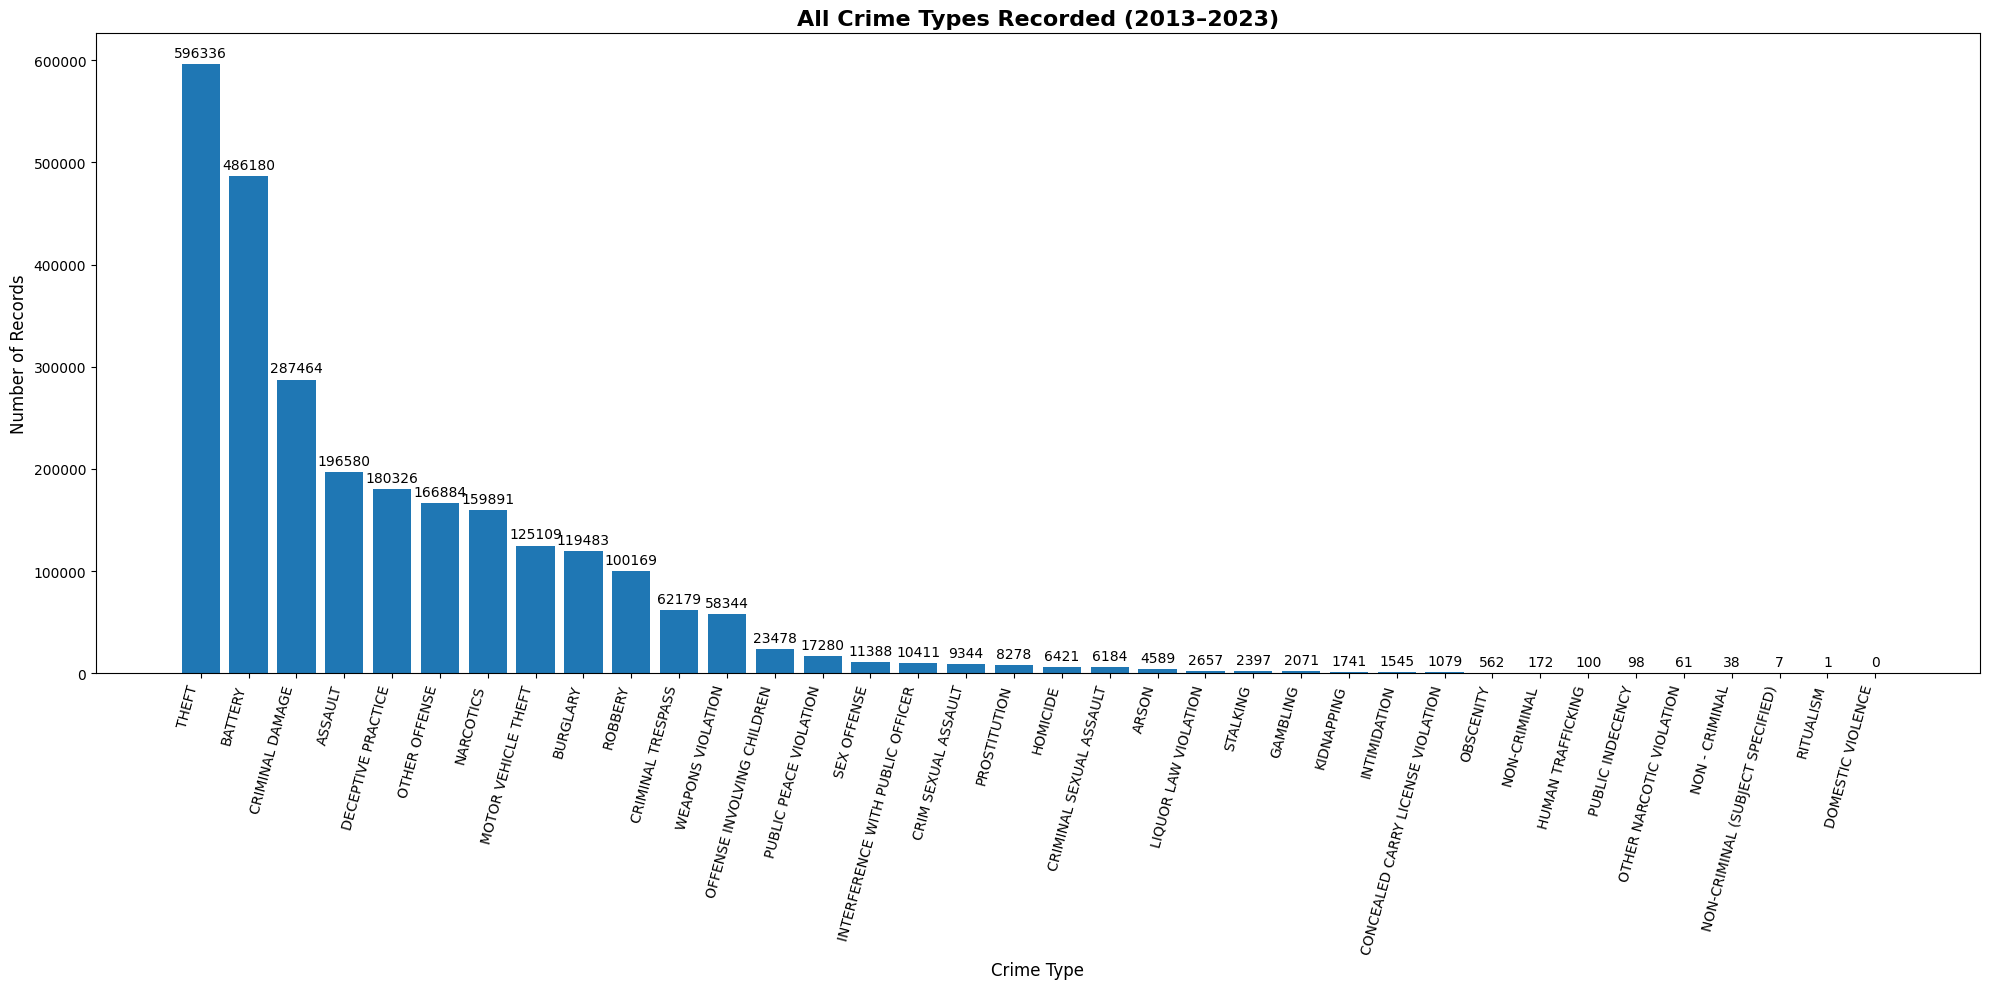

In [90]:
# Count all crime types from the index
crime_type_counts = crime_ten_yrs.index.value_counts()

# Create vertical bar chart
plt.figure(figsize=(20,10))
bars = plt.bar(crime_type_counts.index, crime_type_counts.values, color="#1f77b4")

# Add chart title and labels
plt.title("All Crime Types Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=75, ha="right")

# Add labels on top of bars
plt.bar_label(bars, fmt="%.0f", padding=3)

# Show chart
plt.tight_layout()
plt.show()


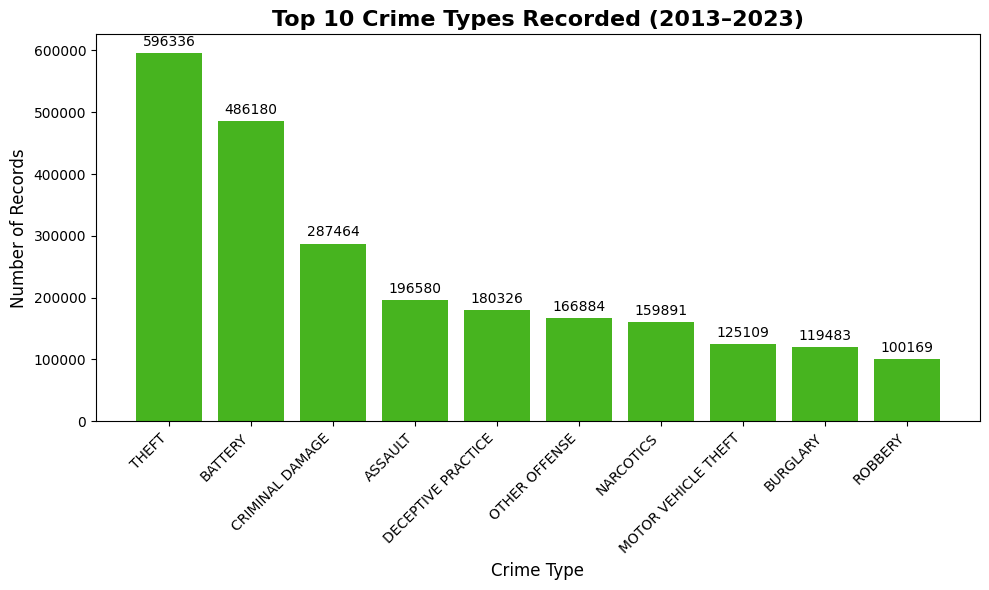

In [ ]:
# Sort crime counts and take Top 10
top_crimes = crime_type_counts.sort_values(ascending=False).head(10)

# Create vertical bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top_crimes.index, top_crimes.values, color="#47b41f")

# Add chart title and labels
plt.title("Top 10 Crime Types Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Rotate x labels
plt.xticks(rotation=45, ha="right")

# Add value labels on top of bars
plt.bar_label(bars, fmt="%.0f", padding=3)

# displaying chart
plt.show()


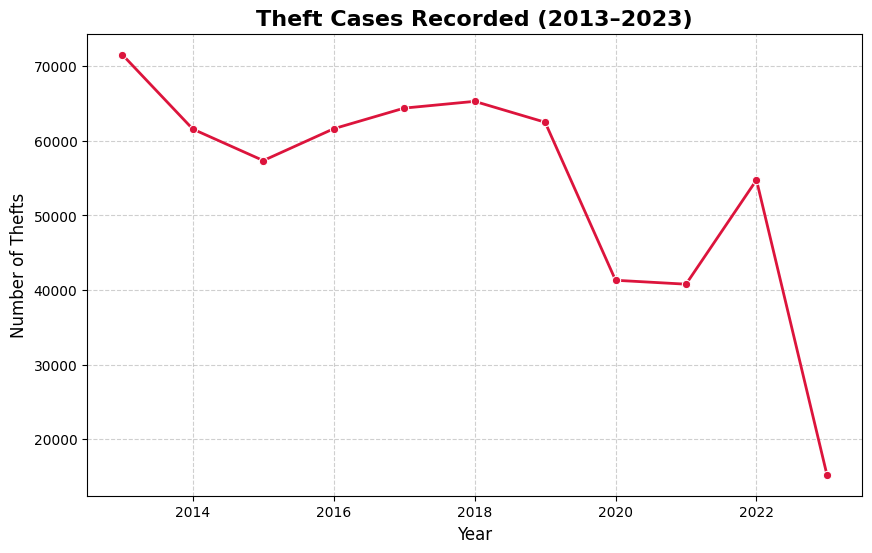

In [ ]:
#Select only the THEFT crimes
theft_crime = crime_ten_yrs.loc["THEFT"]

#Grouping by year and count
theft_by_year = theft_crime.groupby("year").size()

# Plotting the line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=theft_by_year.index, y=theft_by_year.values, 
             marker="o", color="crimson", linewidth=2)

# Adding the chart details
plt.title("Theft Cases Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Thefts", fontsize=12)

# Add grid 
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()
